## Data card understanding

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy
import numpy as np
import data_understanding_utils as du
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
# not cut columns
pd.set_option('display.max_columns',None)

path= "./data/"
card_data = pd.read_csv(path+"card_dev.csv", sep=';')

card_data

,card_id,disp_id,type,issued
0,1005,9285,classic,931107
1,104,588,classic,940119
2,747,4915,classic,940205
3,70,439,classic,940208
4,577,3687,classic,940215
...,...,...,...,...
172,243,1478,classic,961213
173,162,967,junior,961223
174,594,3794,junior,961227
175,609,3893,classic,961229


### 2.2 Describe data



#### Dimensions of the dataset 

In [8]:
du.info_data(card_data,"shape","")
du.info_data(card_data,"head","")


(177, 4)

   card_id  disp_id     type  issued
0     1005     9285  classic  931107
1      104      588  classic  940119
2      747     4915  classic  940205
3       70      439  classic  940208
4      577     3687  classic  940215



#### Info about the dataset

In [9]:
du.info_data(card_data,"info","")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  177 non-null    int64 
 1   disp_id  177 non-null    int64 
 2   type     177 non-null    object
 3   issued   177 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB
None



#### Statistical Summary

In [10]:
du.info_data(card_data,"describe","")
statistical_summary = card_data.describe()

           card_id       disp_id         issued
count   177.000000    177.000000     177.000000
mean    433.576271   3031.723164  954971.259887
std     290.507562   2632.338944    7217.974691
min       3.000000     41.000000  931107.000000
25%     183.000000   1080.000000  950616.000000
50%     397.000000   2513.000000  960221.000000
75%     661.000000   4270.000000  960831.000000
max    1247.000000  13660.000000  961231.000000



#### Class Distribution by type class

In [15]:
du.info_data(card_data,"","card_type")
card_data.groupby("type").size()
print("Card count: ",len(card_data))

type
classic    127
gold         9
junior      41
dtype: int64

Card count:  177


Few persons cards , why? old dataset?

### Data Summarization

To better understand the dataset from card_dev.csv, we can will merge the dataset with the dataset from loan_dev.csv, and for that we need to also use the dataset from disp_dev.csv to get account_id

In [38]:
loans = pd.read_csv (path+"loan_dev.csv", sep=';')
disp = pd.read_csv(path+"disp.csv", sep=';')
card_disp = pd.merge(card_data, disp,how="left" ,on='disp_id')
loan_cards = pd.merge(loans, card_disp ,on='account_id')



#### Merge card_dev.csv with disp_dev.csv

In [36]:
card_disp

,card_id,disp_id,type_x,issued,client_id,account_id,type_y
0,1005,9285,classic,931107,9593,7753,OWNER
1,104,588,classic,940119,588,489,OWNER
2,747,4915,classic,940205,4915,4078,OWNER
3,70,439,classic,940208,439,361,OWNER
4,577,3687,classic,940215,3687,3050,OWNER
...,...,...,...,...,...,...,...
172,243,1478,classic,961213,1478,1225,OWNER
173,162,967,junior,961223,967,807,OWNER
174,594,3794,junior,961227,3794,3138,OWNER
175,609,3893,classic,961229,3893,3219,OWNER


#### Merge the result above with loan_dev.csv

In [39]:
loan_cards.head(40)

,loan_id,account_id,date,amount,duration,payments,status,card_id,disp_id,type_x,issued,client_id,type_y
0,6577,7753,940311,51696,24,2154,1,1005,9285,classic,931107,9593,OWNER
1,5595,3050,940902,82896,12,6908,1,577,3687,classic,940215,3687,OWNER
2,7243,11042,951204,217152,36,6032,1,1225,13268,classic,951122,13576,OWNER
3,5900,4503,960101,135360,48,2820,1,783,5433,junior,951024,5433,OWNER
4,6550,7614,960518,320592,48,6679,1,989,9119,classic,960221,9427,OWNER
5,5311,1766,960615,30060,60,501,1,337,2141,classic,960101,2141,OWNER
6,6992,9790,960727,133968,48,2791,1,1134,11742,classic,960531,12050,OWNER
7,7305,11359,960806,54024,12,4502,1,1247,13660,classic,950613,13968,OWNER
8,5088,544,960822,91152,24,3798,1,119,655,classic,960808,655,OWNER
9,7154,10520,961205,417600,60,6960,1,1187,12635,gold,960717,12943,OWNER


In [40]:
loan_cards.groupby("status").size()
print("status count: ",len(loan_cards))

status
1    11
dtype: int64

status count:  11


We can see that in the data preparation, will be usefull to change names of some columns, for example, we can change column "type" to "card_type" to avoid confusion with account type. Also, after a more detailed analysis, maybe we will need to change the type or sacle of some atributes, for example, the column "issued" is a date, and we can change the to other scale, or change the type of some categorical atribute to numerical, for example, the column "type" (from card_dev.csv) can be changed to numerical, because it is a categorical atribute, and maybe we can use it in the model. For that, we can use a binary count, where 0 to one of the 3 types of cards means account is not that type of card, and 1 means it is that type of card.
Sort the dataset by loan date will be usefull to later analysis, for example, to see the evolution of the loan amount over time or to create dataset training and test that are more representative of the real world.
Because few clients have cards, when we merge card_dev.csv we get a lot of NAN values, so we will need to fill them with some value, for example, we can fill with 0, because if the client does not have a card, the value junior, classic or gold is 0.

#### Data visualization

<Figure size 1000x1000 with 0 Axes>

/tmp/ipykernel_17758/3360934903.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_cards.corr(), annot=True, cbar=True, cmap='coolwarm')


<AxesSubplot: >

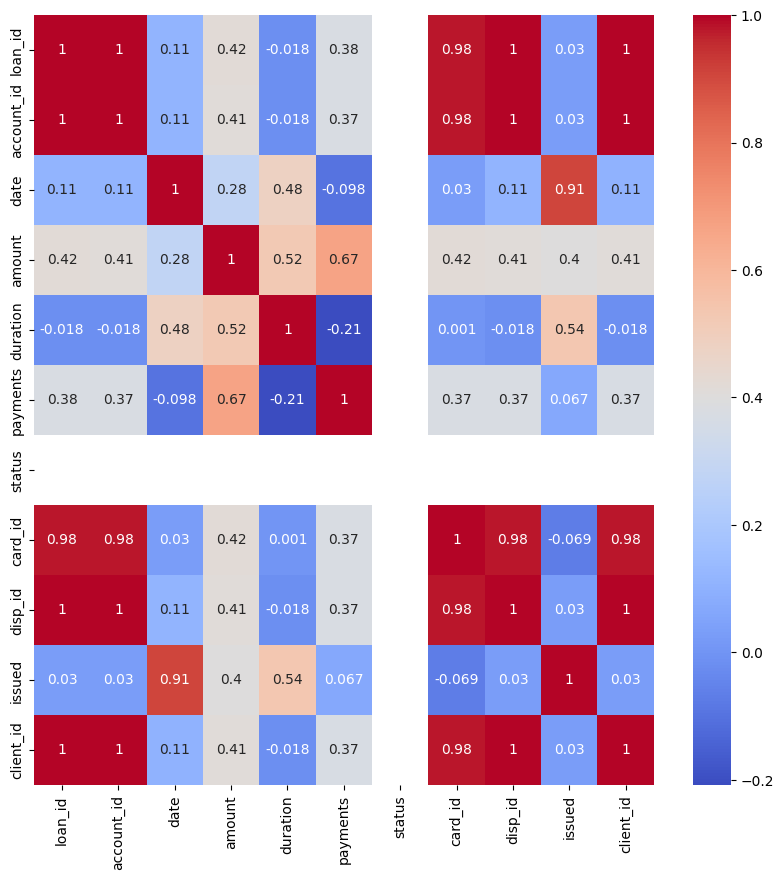

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(loan_cards.corr(), annot=True, cbar=True, cmap='coolwarm')

More data visualization ?